# Credit Card Fraud Detection Project


![image.png](attachment:image.png)

## First step: Imports

In [1]:
# Import the libraries i need to use
from __future__ import print_function
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

import time
import warnings
warnings.filterwarnings('ignore')

## Second step: Reading Dataset

In [4]:
df_train=pd.read_csv(r"E:\fraud credit card dataset\fraudTrain.csv")

df_test=pd.read_csv(r"E:\fraud credit card dataset\fraudTest.csv")

In [5]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
df_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [7]:
df_train.shape

(1296675, 23)

In [8]:
df_test.shape

(555719, 23)

In [9]:
df_train.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

## Third step: Data preprocessing:

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [20]:
# show categorical data describtion
df_train.describe(exclude=[np.number])

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [21]:
df_train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

## the dataset is highly unbalanced, the target variable classes are not represented equally.

### and this will cause bias in our model to the majority class ( calss 0  )

## Data Cleaning

### 1-Handlig null values¶

In [22]:
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [23]:
df_test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [24]:
# no null values

### 2- Handlig duplicates

In [25]:
df_train.duplicated().sum()

0

In [26]:
df_test.duplicated().sum()

0

no duplicated values

Drop unnamed columns

In [27]:
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### 3- Handling date time

In [29]:
df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

concatenate training data and testing data

In [30]:
total = pd.concat([df_test,df_train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [31]:
total.shape

(1852394, 23)

#### total nunber of transactions

In [32]:
len(total)

1852394

In [33]:
total.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
dtype: object

## Data Exploration

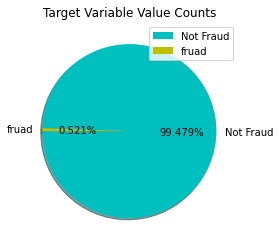

In [34]:
labels=total.is_fraud.unique()

sizes=total.is_fraud.value_counts().values
mycolors = ["c", "y"]
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Not Fraud","fruad"], autopct='%1.3f%%',colors=mycolors,shadow=True,startangle = 180)
ax.set_title('Target Variable Value Counts')
plt.legend()
plt.show()

## this shows how the dataset is inbalanced

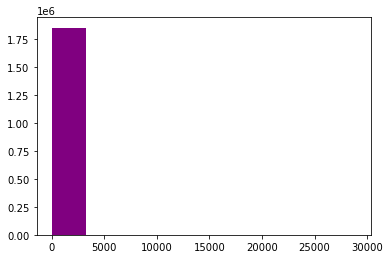

Minimum amount value is  1.0
Maximum amount value is  28948.9
90% of the transactions have an amount less or equal than  136.67


In [37]:
plt.hist(total.amt.values, 9, histtype='bar', facecolor='purple')
plt.show()

print("Minimum amount value is ", np.min(df_train.amt.values))
print("Maximum amount value is ", np.max(df_train.amt.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df_train.amt.values, 90))

In [38]:
total.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

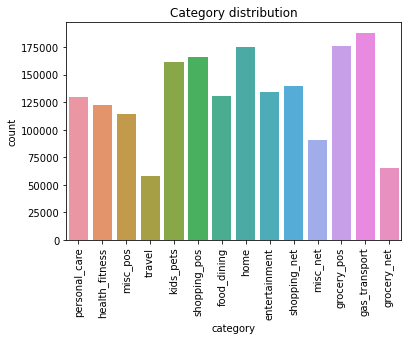

In [39]:
sns.countplot(x='category', data=total)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

### The categories the people used credit cards in it

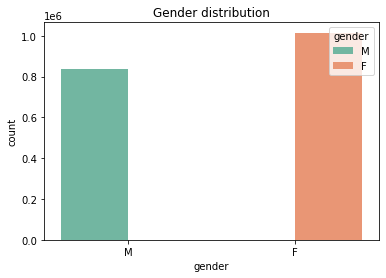

In [43]:
sns.countplot(x='gender',hue="gender" ,data=total,palette = "Set2")
plt.title('Gender distribution')
plt.show()

### count plots  shows that women have experienced more fraud than men.

<AxesSubplot:>

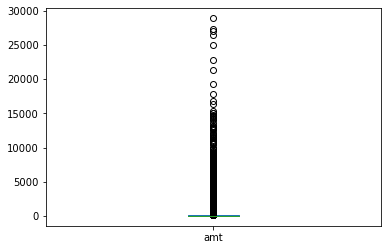

In [44]:
total["amt"].plot(kind='box')

<AxesSubplot:>

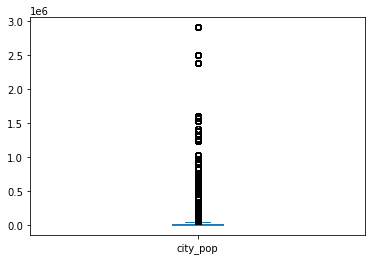

In [45]:
total["city_pop"].plot(kind='box')

### dataset has an outlires

## 3- Looking for correlation

<AxesSubplot:>

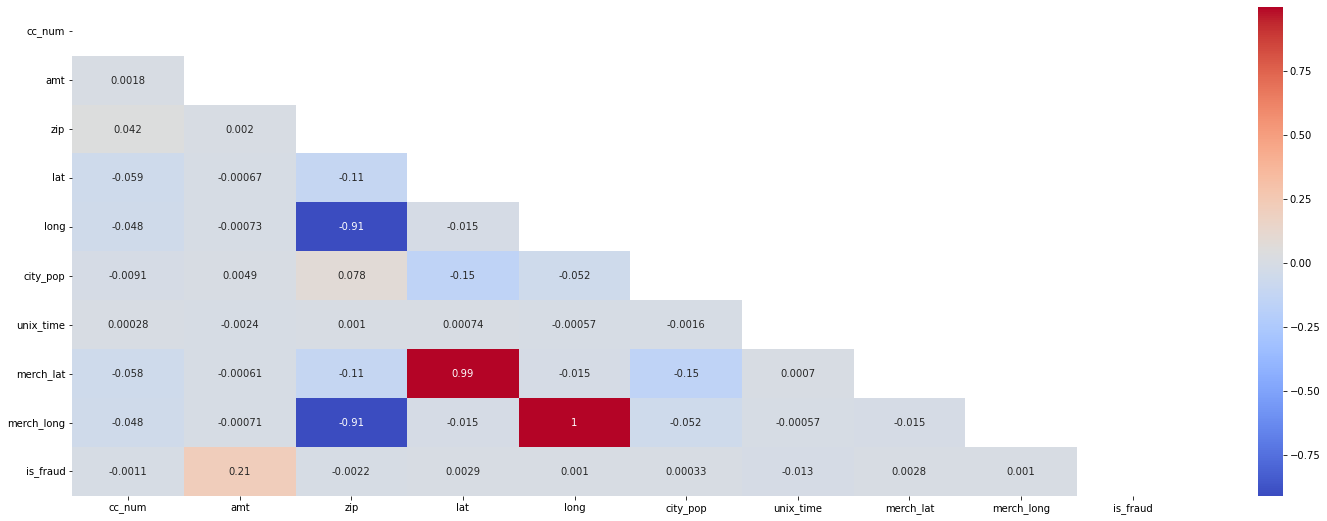

In [46]:
fig = plt.figure(figsize=(25,9))
mask = np.triu(np.ones_like(total.corr()))
sns.heatmap(total.corr(), mask=mask, cmap='coolwarm', annot=True)

In [47]:
#Calculate distance between merchant and home location
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

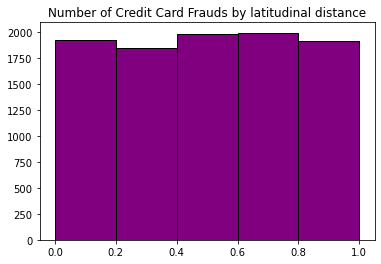

In [49]:
fraud = total[total["is_fraud"] == 1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor="black", bins=5, color="purple")
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

In [51]:
total.gender.value_counts()


F    1014749
M     837645
Name: gender, dtype: int64

In [52]:
# Convert categorical column gender into numerical 
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

0    1014749
1     837645
Name: gender, dtype: int64

In [54]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"].head()

0    52.0
1    30.0
2    49.0
3    32.0
4    64.0
Name: age, dtype: float64

In [57]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [58]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

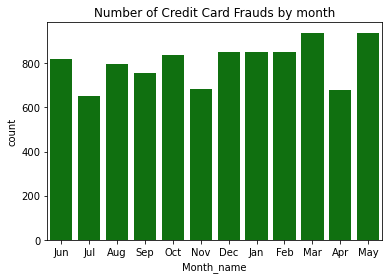

In [59]:
sns.countplot(total[total["is_fraud"]==1]["Month_name"],color="green")
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

### The count plot shows the number of fraudulent transactions made by each month 
 #### appear march and April have the biggest amount approximatly 870 fraud transactions

In [60]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 int64         
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [61]:
# Dropping final set of variables not useful for model building

drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state',"first","last","cc_num","merchant","street","unix_time","trans_num"]
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   category               object 
 1   amt                    float64
 2   gender                 int64  
 3   zip                    int64  
 4   city_pop               int64  
 5   is_fraud               int64  
 6   latitudinal_distance   float64
 7   longitudinal_distance  float64
 8   age                    float64
 9   trans_month            int64  
 10  trans_year             int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 169.6+ MB


In [62]:
total.drop("zip",axis=1)

,category,amt,gender,city_pop,is_fraud,latitudinal_distance,longitudinal_distance,age,trans_month,trans_year
0,personal_care,2.86,1,333497,0,0.020,0.265,52.0,6,2020
1,personal_care,29.84,0,302,0,0.870,0.476,30.0,6,2020
2,health_fitness,41.28,0,34496,0,0.177,0.660,49.0,6,2020
3,misc_pos,60.05,1,54767,0,0.243,0.064,32.0,6,2020
4,travel,3.19,1,1126,0,0.706,0.868,64.0,6,2020
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,1,258,0,0.876,0.787,58.0,6,2020
1296671,food_dining,51.70,1,100,0,0.360,0.736,40.0,6,2020
1296672,food_dining,105.93,1,899,0,0.680,0.688,52.0,6,2020
1296673,food_dining,74.90,1,1126,0,0.564,0.700,39.0,6,2020


In [63]:
# encode categoriacal data
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   zip                      int64  
 3   city_pop                 int64  
 4   is_fraud                 int64  
 5   latitudinal_distance     float64
 6   longitudinal_distance    float64
 7   age                      float64
 8   trans_month              int64  
 9   trans_year               int64  
 10  category_food_dining     uint8  
 11  category_gas_transport   uint8  
 12  category_grocery_net     uint8  
 13  category_grocery_pos     uint8  
 14  category_health_fitness  uint8  
 15  category_home            uint8  
 16  category_kids_pets       uint8  
 17  category_misc_net        uint8  
 18  category_misc_pos        uint8  
 19  category_personal_care   uint8  
 20  category_shopping_net    uint8  
 21  category

## Correcting the imbalance discovered by using resample

In [67]:
#create two different dataframe of majority and minority class 
df_majority = total[(total['is_fraud']==0)] #not froud
df_minority = total[(total['is_fraud']==1)] # froud

df_majority.shape,df_minority.shape

((1842743, 23), (9651, 23))

In [68]:
# upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 23)

In [72]:
# Combine majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(3685486, 23)

In [73]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['amt',
 'gender',
 'zip',
 'city_pop',
 'latitudinal_distance',
 'longitudinal_distance',
 'age',
 'trans_month',
 'trans_year',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [75]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685486 entries, 909017 to 1296674
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   zip                      int64  
 3   city_pop                 int64  
 4   latitudinal_distance     float64
 5   longitudinal_distance    float64
 6   age                      float64
 7   trans_month              int64  
 8   trans_year               int64  
 9   category_food_dining     uint8  
 10  category_gas_transport   uint8  
 11  category_grocery_net     uint8  
 12  category_grocery_pos     uint8  
 13  category_health_fitness  uint8  
 14  category_home            uint8  
 15  category_kids_pets       uint8  
 16  category_misc_net        uint8  
 17  category_misc_pos        uint8  
 18  category_personal_care   uint8  
 19  category_shopping_net    uint8  
 20  category_shopping_pos    uint8  
 21  cat

# Train- test split 

### we devide dataset into 70% training and 30% testing

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.3, random_state=42)

In [77]:
#for balance data range [-3,3] to be normal distribution
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## Modeling

### Build a Decision Tree Classifier model with Scikit-Learn¶

In [79]:
# gives importance to unrepresentive classes
w_train=compute_sample_weight("balanced",Y_train)
from sklearn.tree import DecisionTreeClassifier

In [80]:
sklearn_tree=DecisionTreeClassifier(max_depth=4,min_samples_leaf=4,criterion="entropy",random_state=42)
t0=time.time()
sklearn_tree.fit(X_train,Y_train,sample_weight=w_train)
sklearn_time1=time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time1))

[Scikit-Learn] Training time (s):  18.49154


In [81]:
sklearn_tree_pred=sklearn_tree.predict(X_test)
print("Target variable",sklearn_tree_pred[0:5])

Target variable [0 1 1 0 1]


In [82]:
sklearn_roc_auc1 = roc_auc_score(Y_test, sklearn_tree_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc1))

[Scikit-Learn] ROC-AUC score : 0.909


In [85]:
from sklearn import metrics
acc1_sklearn=metrics.accuracy_score(Y_test, sklearn_tree_pred)
print("DecisionTrees's Accuracy: ", acc1_sklearn)


DecisionTrees's Accuracy:  0.9092268230518629


In [90]:
# Compute confusion matrix
"""from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, sklearn_tree_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= True,  title='Confusion matrix')"""

"from sklearn.metrics import confusion_matrix\n\ncnf_matrix = confusion_matrix(Y_test, sklearn_tree_pred, labels=[1,0])\nnp.set_printoptions(precision=2)\n\n\n# Plot non-normalized confusion matrix\nplt.figure()\nplot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= True,  title='Confusion matrix')"

[Text(0.5648148148148148, 0.9, 'X[0] <= 240.345\nentropy = 1.0\nsamples = 2579840\nvalue = [1289920.0, 1289920.0]'),
 Text(0.2962962962962963, 0.7, 'X[0] <= 24.845\nentropy = 0.73\nsamples = 1576682\nvalue = [1255070.243, 321605.244]'),
 Text(0.14814814814814814, 0.5, 'X[10] <= 0.5\nentropy = 0.947\nsamples = 727838\nvalue = [461714.779, 266121.857]'),
 Text(0.07407407407407407, 0.3, 'X[0] <= 6.935\nentropy = 0.829\nsamples = 625129\nvalue = [461605.779, 163521.141]'),
 Text(0.037037037037037035, 0.1, 'entropy = 0.246\nsamples = 241579\nvalue = [231734.383, 9843.069]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.971\nsamples = 383550\nvalue = [229871.396, 153678.072]'),
 Text(0.2222222222222222, 0.3, 'X[0] <= 21.72\nentropy = 0.012\nsamples = 102709\nvalue = [108.999, 102600.716]'),
 Text(0.18518518518518517, 0.1, 'entropy = 0.003\nsamples = 99070\nvalue = [22.0, 99048.691]'),
 Text(0.25925925925925924, 0.1, 'entropy = 0.163\nsamples = 3639\nvalue = [86.999, 3552.025]'),
 Text(0.44444

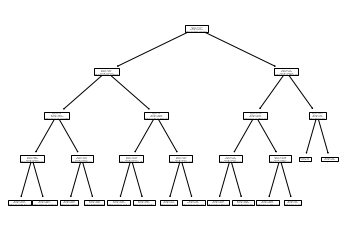

In [91]:
import sklearn.tree as tree
tree.plot_tree(sklearn_tree)

In [92]:
print(classification_report
     (
     Y_test,sklearn_tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91    552814
           1       0.96      0.85      0.90    552832

    accuracy                           0.91   1105646
   macro avg       0.91      0.91      0.91   1105646
weighted avg       0.91      0.91      0.91   1105646



## Build a Decision Tree Classifier model with Snap ML

In [93]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [94]:
from snapml import DecisionTreeClassifier

snapml_tree1=DecisionTreeClassifier(max_depth=4,random_state=45,n_jobs=4)
t0=time.time()
snapml_tree1.fit(X_train,Y_train)
snapml_time1=time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time1))

[Snap ML] Training time (s):  1.63759


In [95]:
snapml_pred_tree=snapml_tree1.predict(X_test)
snapml_pred_tree[0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [97]:
snapml_roc_auc1 = roc_auc_score(Y_test, snapml_pred_tree)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc1))

[Snap ML] ROC-AUC score : 0.922


Normalized confusion matrix
[[0.92 0.08]
 [0.07 0.93]]


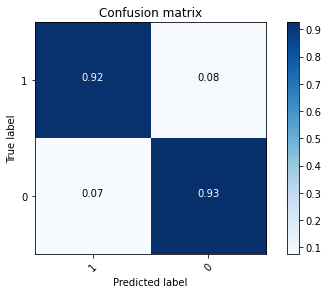

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, snapml_pred_tree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= True,  title='Confusion matrix')

In [99]:
print(classification_report
     (Y_test,snapml_pred_tree
     ))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92    552814
           1       0.92      0.92      0.92    552832

    accuracy                           0.92   1105646
   macro avg       0.92      0.92      0.92   1105646
weighted avg       0.92      0.92      0.92   1105646



## Snap ML vs Scikit-Learn training speedup

In [100]:
training_speedup = sklearn_time1/snapml_time1
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 11.29x 


## Build a Support Vector Machine model with Scikit-Learn

In [101]:
from sklearn.svm import LinearSVC

sklearn_sv=LinearSVC(class_weight="balanced",random_state=30,loss="squared_hinge",fit_intercept=False)
t0 = time.time()
sklearn_sv.fit(X_train, Y_train)
sklearn_time2 = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time2))

[Scikit-Learn] Training time (s):  1036.33


In [102]:
sklearn_svm_pred=sklearn_sv.predict(X_test)
sklearn_svm_pred[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [103]:
acc_sklearn2  = roc_auc_score(Y_test, sklearn_svm_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn2))


[Scikit-Learn] ROC-AUC score:   0.606


In [104]:
acc2_sklearn=metrics.accuracy_score(Y_test, sklearn_svm_pred)
print("SVM's Accuracy: ", acc2_sklearn)


SVM's Accuracy:  0.6060484097079897


In [85]:
from sklearn.metrics import f1_score
f1_score(Y_test, sklearn_svm_pred) 

0.6803113428771692

Normalized confusion matrix
[[0.84 0.16]
 [0.63 0.37]]


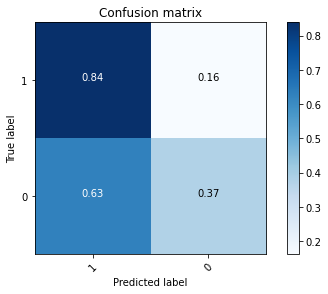

In [86]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, sklearn_svm_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= True,  title='Confusion matrix')

In [87]:
print(classification_report
     (Y_test,sklearn_svm_pred
     ))

              precision    recall  f1-score   support

           0       0.70      0.37      0.49    552814
           1       0.57      0.84      0.68    552832

    accuracy                           0.61   1105646
   macro avg       0.64      0.61      0.58   1105646
weighted avg       0.64      0.61      0.58   1105646



## Build a Support Vector Machine with Snap ML

In [88]:
from snapml import SupportVectorMachine

snapml_sv=SupportVectorMachine(class_weight="balanced",random_state=30,n_jobs=4,fit_intercept=False)
#print(snapml_sv.get_params())

t0 = time.time()
model = snapml_sv.fit(X_train, Y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  12306.19


In [106]:
snapml_pred2=snapml_sv.decision_function(X_test)
acc_snapml2  = roc_auc_score(Y_test, snapml_pred2)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml2))

NameError: name 'snapml_sv' is not defined

In [107]:
training_speedup = sklearn_time2/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))


NameError: name 'snapml_time' is not defined

## Evaluate Logistic regression using the Scikit-Learn

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [109]:
sklearn_logis=LogisticRegression(C=0.001,solver="saga")
t0=time.time()
sklearn_logis.fit(X_train,Y_train)
sklearn_time=time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(sklearn_time))

[Snap ML] Training time (s):  355.72906


In [110]:
sklearn_logis_pred=sklearn_logis.predict(X_test)
sklearn_logis_pred[0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [111]:
acc3_sklearn=metrics.accuracy_score(Y_test, sklearn_logis_pred)
print("Logistic's Accuracy: ",acc3_sklearn)


Logistic's Accuracy:  0.8573765925079094


In [112]:
sklearn_roc_auc3 = roc_auc_score(Y_test, sklearn_logis_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc3))

[Scikit-Learn] ROC-AUC score : 0.857


In [113]:
from sklearn.metrics import f1_score
f1_score(Y_test, sklearn_logis_pred) 

0.8382867052189099

In [114]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,sklearn_logis_pred ,pos_label=0)

0.773734159052298

In [115]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test,sklearn_logis_pred ,pos_label=1)

0.721595172393094

Normalized confusion matrix
[[0.74 0.26]
 [0.02 0.98]]


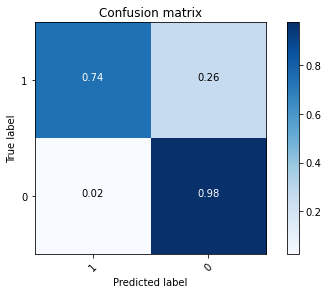

In [116]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, sklearn_logis_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= True,  title='Confusion matrix')

In [117]:
print (classification_report(Y_test,sklearn_logis_pred ))


              precision    recall  f1-score   support

           0       0.79      0.98      0.87    552814
           1       0.97      0.74      0.84    552832

    accuracy                           0.86   1105646
   macro avg       0.88      0.86      0.86   1105646
weighted avg       0.88      0.86      0.86   1105646



## Evalute Logistic regression using snapml¶

In [118]:
from snapml import LogisticRegression


In [119]:
snapml_logis=LogisticRegression(penalty='l2',random_state=31)
t0 = time.time()
model = snapml_logis.fit(X_train, Y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  19.80


In [120]:
snapml_pred3=snapml_logis.predict(X_test)
snapml_pred3[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [121]:
acc_snapml3  = roc_auc_score(Y_test, snapml_pred3)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml3))

[Snap ML] ROC-AUC score:   0.551


# Evaluate Neural Network

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(22,)))

# Hidden layers with regularization (adjust the number of units and regularization strength)
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))  #  we use sigmoid function ,Assuming binary classification , 
                                                   #where sigmoid predict the probability of each class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2944      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 18,529
Trainable params: 18,529
Non-trai

In [125]:
# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=128)

Epoch 1/5
20155/20155 [==============================] - 144s 7ms/step - loss: 2.4661 - accuracy: 0.7595
Epoch 2/5
20155/20155 [==============================] - 137s 7ms/step - loss: 0.4787 - accuracy: 0.8024
Epoch 3/5
20155/20155 [==============================] - 132s 7ms/step - loss: 0.4590 - accuracy: 0.8184
Epoch 4/5
20155/20155 [==============================] - 140s 7ms/step - loss: 0.4531 - accuracy: 0.8186
Epoch 5/5
20155/20155 [==============================] - 142s 7ms/step - loss: 0.4555 - accuracy: 0.8156


In [126]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

34552/34552 [==============================] - 153s 4ms/step - loss: 0.4801 - accuracy: 0.7942
Test Accuracy: 0.7941963076591492


In [127]:
y_pred =model.predict(X_test)
y_pred[0:5]

34552/34552 [==============================] - 167s 5ms/step


array([[0.29],
       [0.95],
       [0.77],
       [0.29],
       [0.95]], dtype=float32)

In [128]:
y_pred_binary = (y_pred > 0.5).astype(int)
y_pred_binary[0:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

## Model comparisom

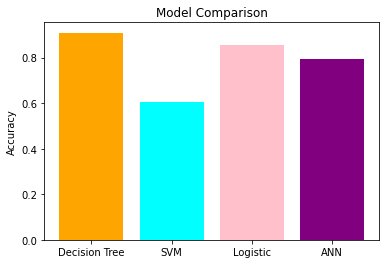



Accuracy of Decision Tree: 0.91

Accuracy of SVM: 0.61

Accuracy of Logistic regression: 0.86

Maximum Accuracy: 0.91
Model with Maximum Accuracy: Decision Tree


In [130]:
# using sklearn 

models=["Decision Tree","SVM","Logistic","ANN"]

acc=[acc1_sklearn,acc2_sklearn,acc3_sklearn,test_accuracy]

plt.bar(models, acc, color=['orange', 'cyan','pink',"purple"])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()

max_accuracy = max(acc)
max_index = acc.index(max_accuracy)
max_model = models[max_index]
print(f'\n\nAccuracy of Decision Tree: {acc1_sklearn:.2f}\n')
print(f'Accuracy of SVM: {acc2_sklearn:.2f}\n')
print(f'Accuracy of Logistic regression: {acc3_sklearn:.2f}\n')
print(f'Maximum Accuracy: {max_accuracy:.2f}')
print(f'Model with Maximum Accuracy: {max_model}')